# Feedforward Neural Network 
This notebook implements a simple yet effective FNN model.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Load Pre-processed Data

In [3]:
X_train_scaled = pd.read_csv('../dataset/train_test_split/X_train_scaled.csv').values
y_train = pd.read_csv('../dataset/train_test_split/y_train.csv').values
X_test_scaled = pd.read_csv('../dataset/train_test_split/X_test_scaled.csv').values
y_test = pd.read_csv('../dataset/train_test_split/y_test.csv').values

## 3. Build Feedforward Neural Network

In [ ]:
dropout = 0.7

def build_fnn_model(input_dim, learning_rate=0.001):
    """
    Build a Feedforward Neural Network
    
    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for optimizer
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        
        # Output layer (regression)
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss = tf.keras.losses.Huber(delta=1.0),  # Use Huber as loss,
        metrics=['mae', 'mse']
    )
    
    return model


## 4. Setup Callbacks

In [5]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'checkpoint/best_fnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## 5. Train the Model

In [6]:
class TrainingLogger(Callback):
    def on_train_begin(self, logs=None):
        print("🚀 Training started...")

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 20 == 0:
            print(f"✅ Epoch {epoch+1} done. Loss: {logs['loss']:.4f}, Val Loss: {logs['val_loss']:.4f}")

    def on_train_end(self, logs=None):
        print("🏁 Training finished.")

    def on_train_batch_end(self, batch, logs=None):
        pass  # no per-batch output

In [7]:
input_dim = X_train_scaled.shape[1]

model = build_fnn_model(input_dim)
print(model.summary())

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop, reduce_lr, checkpoint, TrainingLogger()],
    verbose=0
)

c:\Users\grise\OneDrive\Desktop\AI-challenge\SolarSystemForecaster\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 432,001 (1.65 MB)

 Trainable params: 427,521 (1.63 MB)

 Non-trainable params: 4,480 (17.50 KB)

None
🚀 Training started...

Epoch 1: val_loss improved from None to 27.06173, saving model to checkpoint/best_fnn_model.h5



Epoch 2: val_loss improved from 27.06173 to 8.36144, saving model to checkpoint/best_fnn_model.h5



Epoch 3: val_loss improved from 8.36144 to 7.82515, saving model to checkpoint/best_fnn_model.h5



Epoch 4: val_loss improved from 7.82515 to 7.29328, saving model to checkpoint/best_fnn_model.h5



Epoch 5: val_loss improved from 7.29328 to 7.28390, saving model to checkpoint/best_fnn_model.h5



Epoch 6: val_loss improved from 7.28390 to 7.06735, saving model to checkpoint/best_fnn_model.h5



Epoch 7: val_loss did not improve from 7.06735

Epoch 8: val_loss improved from 7.06735 to 6.79714, saving model to checkpoint/best_fnn_model.h5



Epoch 9: val_loss did not improve from 6.79714

Epoch 10: val_loss improved from 6.79714 to 6.76979, saving model to checkpoint/best_fnn_model.h5



Epoch 11: val_loss did not improve from 6.76979

Epoch 12: val_loss improved from 6.76979 to 6.64667, saving model to checkpoint/best_fnn_model.h5



Epoch 13: val_loss did not improve from 6.64667

Epoch 14: val_loss did not improve from 6.64667

Epoch 15: val_loss did not improve from 6.64667

Epoch 16: val_loss improved from 6.64667 to 6.48833, saving model to checkpoint/best_fnn_model.h5



Epoch 17: val_loss improved from 6.48833 to 6.46615, saving model to checkpoint/best_fnn_model.h5



Epoch 18: val_loss did not improve from 6.46615

Epoch 19: val_loss improved from 6.46615 to 6.44114, saving model to checkpoint/best_fnn_model.h5



Epoch 20: val_loss improved from 6.44114 to 6.43790, saving model to checkpoint/best_fnn_model.h5


✅ Epoch 20 done. Loss: 8.7698, Val Loss: 6.4379

Epoch 21: val_loss did not improve from 6.43790

Epoch 22: val_loss did not improve from 6.43790

Epoch 23: val_loss did not improve from 6.43790

Epoch 24: val_loss improved from 6.43790 to 6.40237, saving model to checkpoint/best_fnn_model.h5



Epoch 25: val_loss improved from 6.40237 to 6.33780, saving model to checkpoint/best_fnn_model.h5



Epoch 26: val_loss did not improve from 6.33780

Epoch 27: val_loss did not improve from 6.33780

Epoch 28: val_loss did not improve from 6.33780

Epoch 29: val_loss did not improve from 6.33780

Epoch 30: val_loss did not improve from 6.33780

Epoch 31: val_loss did not improve from 6.33780

Epoch 32: val_loss improved from 6.33780 to 6.32191, saving model to checkpoint/best_fnn_model.h5



Epoch 33: val_loss did not improve from 6.32191

Epoch 34: val_loss improved from 6.32191 to 6.28953, saving model to checkpoint/best_fnn_model.h5



Epoch 35: val_loss did not improve from 6.28953

Epoch 36: val_loss did not improve from 6.28953

Epoch 37: val_loss did not improve from 6.28953

Epoch 38: val_loss improved from 6.28953 to 6.28855, saving model to checkpoint/best_fnn_model.h5



Epoch 39: val_loss did not improve from 6.28855

Epoch 40: val_loss did not improve from 6.28855
✅ Epoch 40 done. Loss: 8.3495, Val Loss: 6.5195

Epoch 41: val_loss did not improve from 6.28855

Epoch 42: val_loss improved from 6.28855 to 6.22142, saving model to checkpoint/best_fnn_model.h5



Epoch 43: val_loss did not improve from 6.22142

Epoch 44: val_loss did not improve from 6.22142

Epoch 45: val_loss did not improve from 6.22142

Epoch 46: val_loss did not improve from 6.22142

Epoch 47: val_loss did not improve from 6.22142

Epoch 48: val_loss did not improve from 6.22142

Epoch 49: val_loss did not improve from 6.22142

Epoch 50: val_loss did not improve from 6.22142

Epoch 51: val_loss did not improve from 6.22142

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 52: val_loss did not improve from 6.22142

Epoch 53: val_loss did not improve from 6.22142

Epoch 54: val_loss did not improve from 6.22142

Epoch 55: val_loss did not improve from 6.22142

Epoch 56: val_loss did not improve from 6.22142

Epoch 57: val_loss improved from 6.22142 to 6.14549, saving model to checkpoint/best_fnn_model.h5



Epoch 58: val_loss did not improve from 6.14549

Epoch 59: val_loss did not improve from 6.14549

Epoch 60: val_loss did not improve from 6.14549
✅ Epoch 60 done. Loss: 7.9655, Val Loss: 6.1983

Epoch 61: val_loss did not improve from 6.14549

Epoch 62: val_loss did not improve from 6.14549

Epoch 63: val_loss did not improve from 6.14549

Epoch 64: val_loss did not improve from 6.14549

Epoch 65: val_loss did not improve from 6.14549

Epoch 66: val_loss did not improve from 6.14549

Epoch 67: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 67: val_loss did not improve from 6.14549

Epoch 68: val_loss did not improve from 6.14549

Epoch 69: val_loss did not improve from 6.14549

Epoch 70: val_loss did not improve from 6.14549

Epoch 71: val_loss did not improve from 6.14549

Epoch 72: val_loss did not improve from 6.14549

Epoch 73: val_loss did not improve from 6.14549

Epoch 74: val_loss did not improve from 6.14549

Epoch 75: val_loss improved from 6.14549


Epoch 76: val_loss improved from 6.13479 to 6.13364, saving model to checkpoint/best_fnn_model.h5



Epoch 77: val_loss improved from 6.13364 to 6.13110, saving model to checkpoint/best_fnn_model.h5



Epoch 78: val_loss did not improve from 6.13110

Epoch 79: val_loss did not improve from 6.13110

Epoch 80: val_loss improved from 6.13110 to 6.10126, saving model to checkpoint/best_fnn_model.h5


✅ Epoch 80 done. Loss: 7.8285, Val Loss: 6.1013

Epoch 81: val_loss improved from 6.10126 to 6.09759, saving model to checkpoint/best_fnn_model.h5



Epoch 82: val_loss improved from 6.09759 to 6.07962, saving model to checkpoint/best_fnn_model.h5



Epoch 83: val_loss did not improve from 6.07962

Epoch 84: val_loss did not improve from 6.07962

Epoch 85: val_loss did not improve from 6.07962

Epoch 86: val_loss did not improve from 6.07962

Epoch 87: val_loss did not improve from 6.07962

Epoch 88: val_loss did not improve from 6.07962

Epoch 89: val_loss did not improve from 6.07962

Epoch 90: val_loss did not improve from 6.07962

Epoch 91: val_loss did not improve from 6.07962

Epoch 92: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 92: val_loss did not improve from 6.07962

Epoch 93: val_loss did not improve from 6.07962

Epoch 94: val_loss did not improve from 6.07962

Epoch 95: val_loss did not improve from 6.07962

Epoch 96: val_loss did not improve from 6.07962

Epoch 97: val_loss did not improve from 6.07962

Epoch 98: val_loss did not improve from 6.07962

Epoch 99: val_loss did not improve from 6.07962

Epoch 100: val_loss did not improve from 6.07962
✅ Epoch 100 done. Loss: 7.6900, Val Los

## 6. Training Visualization

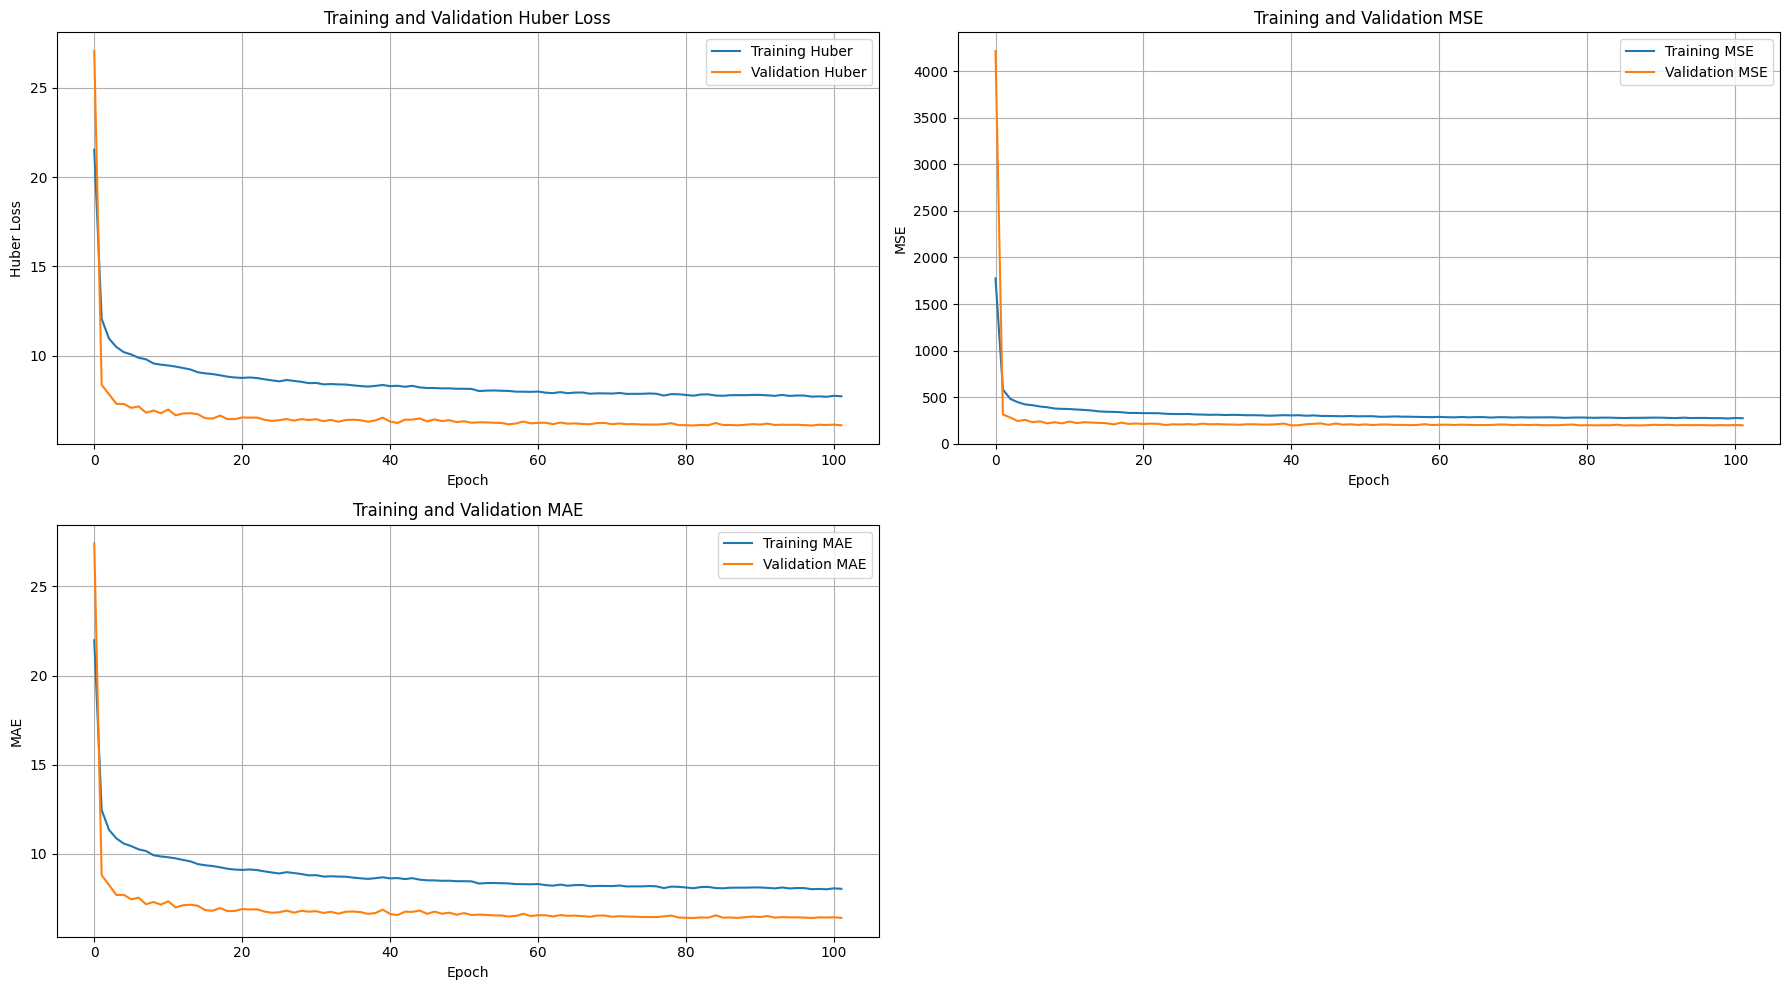

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 2 columns

# Huber Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Huber')
axes[0, 0].plot(history.history['val_loss'], label='Validation Huber')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Huber Loss')
axes[0, 0].set_title('Training and Validation Huber Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# MSE curves
axes[0, 1].plot(history.history['mse'], label='Training MSE')
axes[0, 1].plot(history.history['val_mse'], label='Validation MSE')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Training and Validation MSE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# MAE curves
axes[1, 0].plot(history.history['mae'], label='Training MAE')
axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Training and Validation MAE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Hide the unused subplot (bottom right)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Evaluate the Model

In [9]:
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Custom accuracy within tolerance
tolerance = 0.10  # 10% tolerance

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


# Testing metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


print("\n" + "="*60)
print("FEEDFORWARD NEURAL NETWORK - RESULTS")
print("="*60)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("="*60)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

FEEDFORWARD NEURAL NETWORK - RESULTS

Training Set:
  MSE:  223.1369
  RMSE: 14.9378
  MAE:  7.0644
  R²:   0.8482

Test Set:
  MSE:  201.5605
  RMSE: 14.1972
  MAE:  6.5061
  R²:   0.8178


Plotting Evaluation

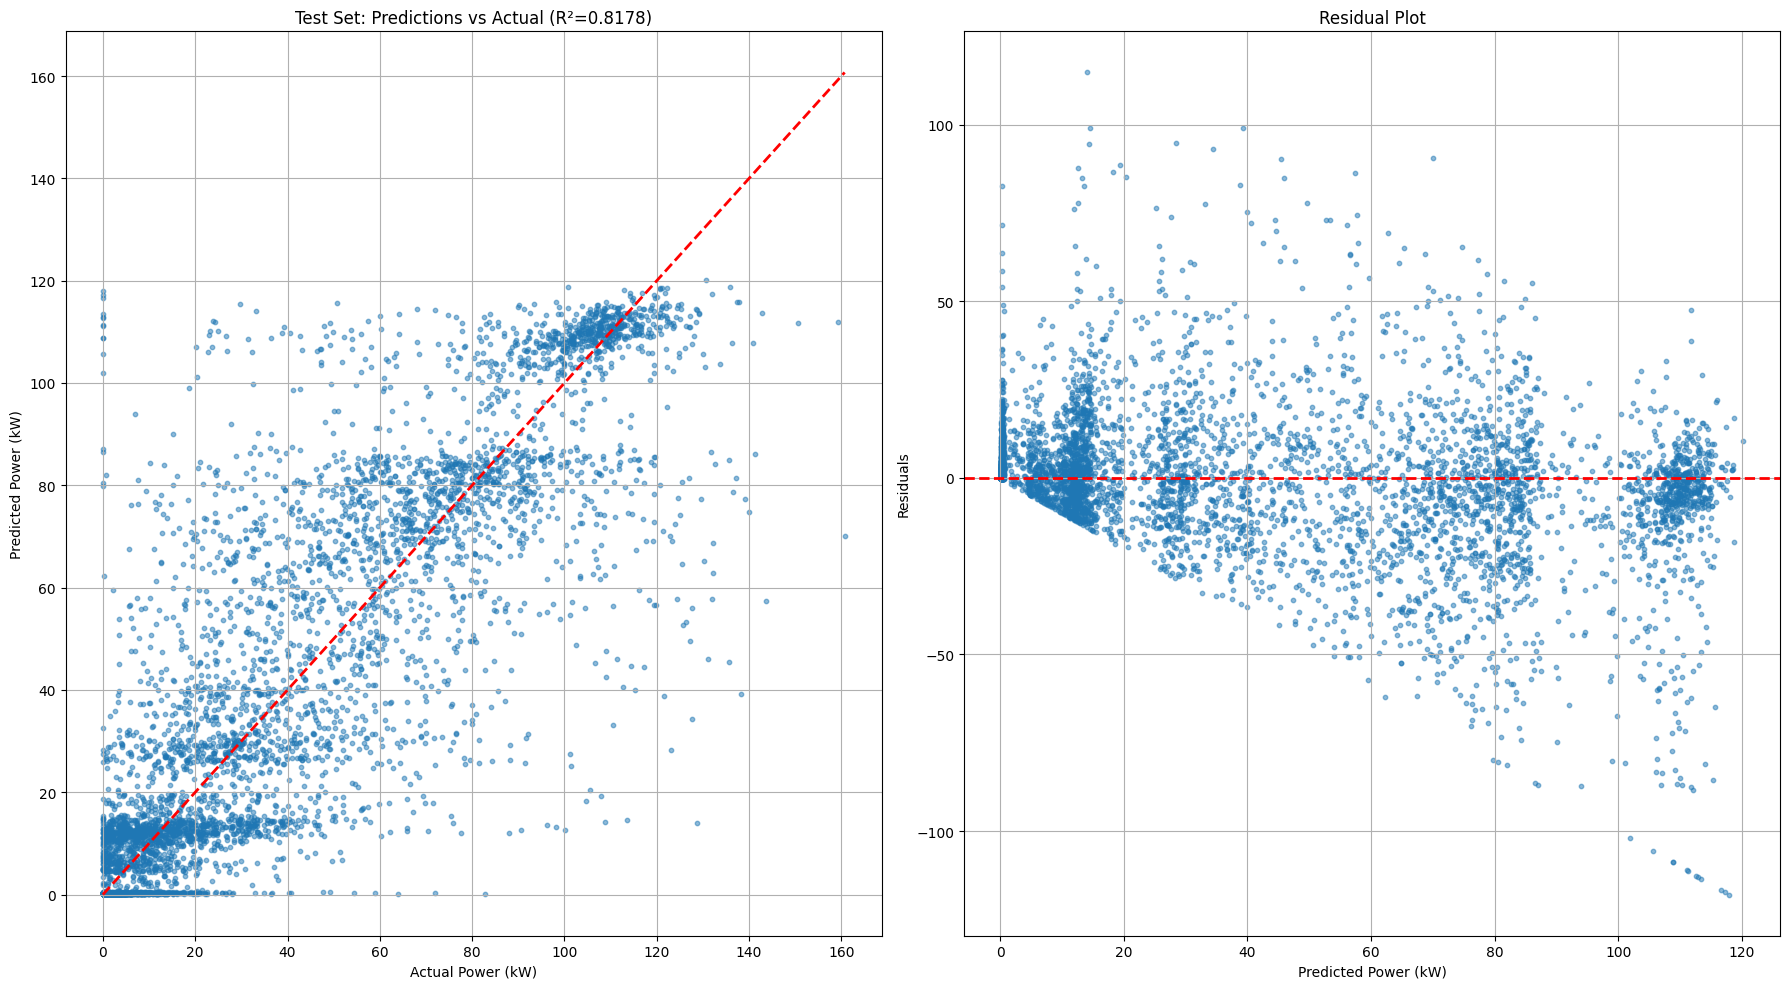

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 rows, 2 columns

# Predictions vs Actual (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power (kW)')
axes[0].set_ylabel('Predicted Power (kW)')
axes[0].set_title(f'Test Set: Predictions vs Actual (R²={test_r2:.4f})')
axes[0].grid(True)

# Residuals plot
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()
residuals = y_test_flat - y_pred_test_flat
axes[1].scatter(y_pred_test_flat, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power (kW)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.savefig('fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save the Model

In [ ]:
model.save('fnn_solar_final.h5')
print("\nModel saved as 'fnn_solar_final.h5'")

## 9. Save Predictions

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Residual': residuals
})
results_df.to_csv('fnn_predictions.csv', index=False)
print("Predictions saved as 'fnn_predictions.csv'")